# TASK 4

## Import Libraries

In [5]:
!pip install transformers
!pip install torch
!pip install tensorflow

   ---------------------------------------- 0.0/203.0 MB ? eta -:--:--
   ---------------------------------------- 0.0/203.0 MB 991.0 kB/s eta 0:03:25
   ---------------------------------------- 0.1/203.0 MB 1.1 MB/s eta 0:02:59
   ---------------------------------------- 0.1/203.0 MB 1.1 MB/s eta 0:02:59
   ---------------------------------------- 0.2/203.0 MB 1.1 MB/s eta 0:03:10
   ---------------------------------------- 0.2/203.0 MB 1.3 MB/s eta 0:02:42
   ---------------------------------------- 0.3/203.0 MB 1.1 MB/s eta 0:03:09
   ---------------------------------------- 0.4/203.0 MB 1.2 MB/s eta 0:02:48
   ---------------------------------------- 0.4/203.0 MB 1.2 MB/s eta 0:02:50
   ---------------------------------------- 0.5/203.0 MB 1.3 MB/s eta 0:02:38
   ---------------------------------------- 0.6/203.0 MB 1.2 MB/s eta 0:02:44
   ---------------------------------------- 0.7/203.0 MB 1.3 MB/s eta 0:02:32
   ---------------------------------------- 0.7/203.0 MB 1.3 MB/s eta

In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from nltk.sentiment import SentimentIntensityAnalyzer
from transformers import pipeline
import plotly.express as px
import warnings
warnings.filterwarnings('ignore')

## Load the Dataset

In [23]:
column_names = ['sentiment','text']
df = pd.read_csv("twitter_training.csv", names=column_names)

df.head()

sentiment                                               text
2401 Borderlands  Positive  im getting on borderlands and i will murder yo...
     Borderlands  Positive  I am coming to the borders and I will kill you...
     Borderlands  Positive  im getting on borderlands and i will kill you ...
     Borderlands  Positive  im coming on borderlands and i will murder you...
     Borderlands  Positive  im getting on borderlands 2 and i will murder ...

## Data Preprocessing

In [24]:
df.isnull().sum()

sentiment      0
text         686
dtype: int64

In [25]:
df.columns

Index(['sentiment', 'text'], dtype='object')

In [26]:
df.dropna(inplace=True)

df['sentiment'].value_counts()

sentiment
Negative      22358
Positive      20655
Neutral       18108
Irrelevant    12875
Name: count, dtype: int64

## Sentiment Analysis 

In [27]:
import nltk
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\Admin\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [28]:
from nltk.sentiment import SentimentIntensityAnalyzer

sia = SentimentIntensityAnalyzer()
df['compound'] = df['text'].apply(lambda x: sia.polarity_scores(x)['compound'])
df['predicted_sentiment'] = df['compound'].apply(lambda x: 'positive' if x > 0 else 'negative' if x < 0 else 'neutral')

## Visualizing Sentiment Distribution

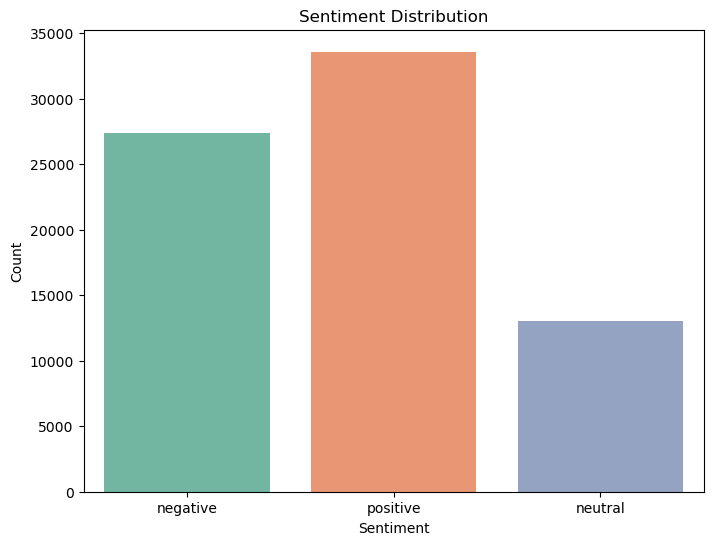

In [29]:
plt.figure(figsize=(8, 6))
sns.countplot(x='predicted_sentiment', data=df, palette='Set2')
plt.title('Sentiment Distribution')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.show()

In [32]:
df.to_csv('sentiment_analysis_results.csv', index=False)